<a href="https://colab.research.google.com/github/monika-chivate/exam/blob/main/ann_to_predict_telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Customer_Churn_Header](https://raw.githubusercontent.com/satishgunjal/images/master/Customer_Churn_Header.png)
<sub><sup>Img Source: NicePNG</sup></sub>

# Index
* [Business Problem](#1)
* [Machine Learning Problem](#2)
* [Approach](#3)
* [Import Libraries](#4)
* [Data Collection](#5)
* [Exploratory Data Analysis](#6)
  - [Understanding the Data](#7)
  - [Data Visualization & Analysis](#8)  
  - [Data Cleaning & Preprocessing](#9)
    - [Feature Selection](#10)
    - [Feature Encoding](#11)
    - [Transform Categorical Values](#12)
	- [Scaling & Normalization](#13)
* [Train Test Split](#14)
* [Modeling](#15)
  - [Model Building](#16)
  - [Model Training](#17)
  - [Model Evaluation](#18)
* [Conclusion](#19)
* [Reference](#20)


# Business Problem <a id ="1"></a>
Based on the available data for the telco customers, predict customer behavior and develop focused customer retention programs.

# Machine Learning Problem <a id ="2"></a>
In order to develop the customer retention program it's important to understand the biggest contributor to customer churning. We will be able to identify those features using exploratory data analysis. We will also build the model which can predict whether that customer churn or not. So based on our EDA analysis the company can design the proactive program that will avoid all those factors which leads to customer attrition and using our ML model they can periodically check whether the customer can leave or not and accordingly take measures to retain the customer.

# Approach <a id ="3"></a>
After you clearly define the Machine Learning problem it's time to finalize the approach to achieve it. There are many algorithms, tools and libraries to choose from. In this case we are going to build Artificial Neural Network (ANN) to predict the customer attrition, also known as customer churn, customer turnover, or customer defection. We will use TensorFlow deep learning framework to build our model.

Customer churn (rate) is the measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support. 

Note: It's not required to use ANN for this problem you can also get very good results using Logistic Regression.

# Import Libraries <a id ="4"></a>
As per our final approach lets import all the necessary libraries that we will use over the course of this project.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Collection <a id ="5"></a>
Our data is in tabular format and source is CSV file. Since our data is available on Kaggle we don't have to do anything extra for collecting the data, we can go ahead and load the data using panda's 'read_csv' function.

In [ ]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f'No of rows/training examples: {df.shape[0]}, No of columns/features: {df.shape[1]}')
df.sample(5)

No of rows/training examples: 7043, No of columns/features: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1093,8659-IOOPU,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,100.45,7159.7,No
3515,5206-HPJKM,Male,0,No,No,17,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.50,934.15,No
114,5256-SKJGO,Female,0,Yes,Yes,64,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,54.60,3423.5,No
6930,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
4097,9974-JFBHQ,Male,0,No,Yes,64,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.15,6171.2,No



# Exploratory Data Analysis <a id ="6"></a>

## Understanding the Data <a id ="7"></a>
* Data set contains 7,043 customers and 21 data points on each customer. 
* Each row represents a customer, each column contains the customer’s attributes.
* Column Churn contain the class labels value, 'Yes' means customer will churn else 'No'
* Customer attributes/features are as below

| Column Name | Description |
|:---|:--- |
| customerID | Customer ID |
| gender | Whether the customer is a male or a female |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service)
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |

## Data Visualization & Analysis <a id ="8"></a>
* In this step we will try to visualize the data based on important features.
* Most important loss is losing the loyal customers. Using feature 'tenure' we can explore such customers.
* We will use histogram to plot the tenure and whether customer leaving or not.

Let review the statistics on the current data 

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


As you can see from above data that tenure and MonthlyCharges values differ by order of magnitude, we will have to address this problem and normalize the data before modeling. Also, it will be interesting to see the effect of MonthlyCharges and tenure on the customer churn.
Now let's check for NA or missing values.

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This is wonderful sign, there are no missing values in the data. One of the most important data is churn status of each customer. Let's print the number of customer  that churned(Yes) and not churned(No)

Text(0.5, 1.0, '26.54 % (1869 nos) of cust will churn & 73.46 % (5174 nos) of cust will retain')

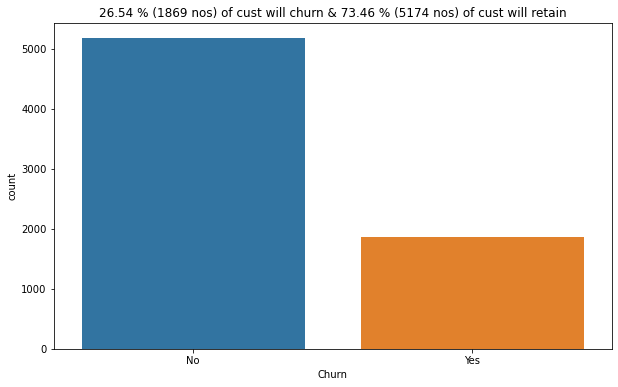

In [ ]:
# Count of customer that will churn
cust_churn_yes_count = df[df.Churn == 'Yes'].shape[0]
# Count of customer that will not churn (retain)
cust_churn_no_count = df[df.Churn == 'No'].shape[0]

# Percentage of customer that will churn
cust_churn_yes_percent = round((cust_churn_yes_count / (cust_churn_yes_count + cust_churn_no_count) * 100),2)
# Percentage of customer that will not churn (retain)
cust_churn_no_percent = round((cust_churn_no_count / (cust_churn_yes_count + cust_churn_no_count) * 100 ),2)

plt.figure(figsize=(10,6))
ax = sns.countplot(df['Churn'])
ax.set_title(f'{cust_churn_yes_percent} % ({cust_churn_yes_count} nos) of cust will churn & {cust_churn_no_percent} % ({cust_churn_no_count} nos) of cust will retain')

As you can see we have imbalanced data, most of the data contains class label 'No' means customer will remain with the company. If out of all the available data 73.46% customers are going to stay with the company, then for any given input we can say with 73% accuracy that the customer will stay with the company. So our first objective is to get the model's accuracy more than 73%, which is better than just doing the guess work.

Note that it's extremely important to get good quality balanced data so that the model will be generalized well enough to perform better in real life scenario. In our case we have to go ahead with whatever data is available and make the best out of it.

Now let's look at the effect of other available features on the customer retention.

Text(0.5, 1.0, 'Effect of Gender on customer churn')

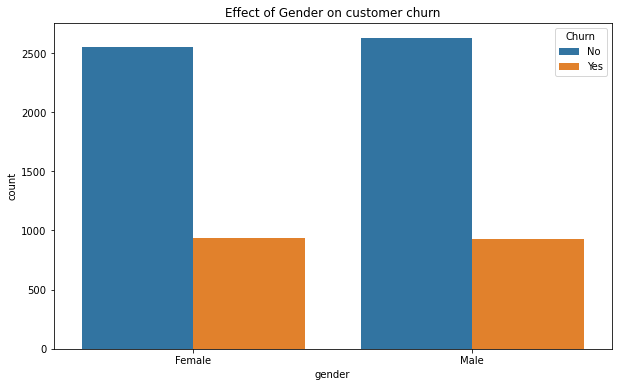

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'gender', hue='Churn', data=df)
ax.set_title(f'Effect of Gender on customer churn')

As you can see customer gender doesn't seem to affecting churn count. Since we have separate columns for senior citizens let check the churn rate for them.

Text(0.5, 0, 'SeniorCitizens(0: No, 1: Yes)')

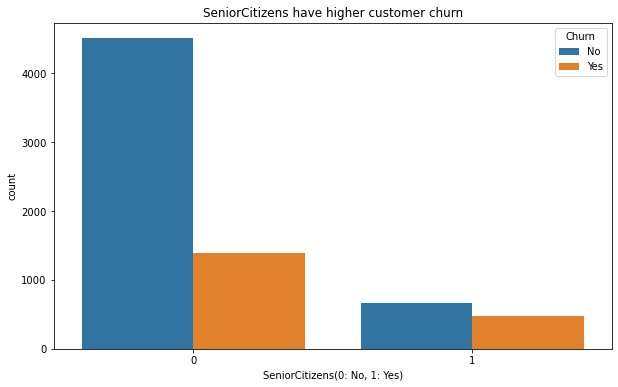

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=df)
ax.set_title(f'SeniorCitizens have higher customer churn')
plt.xlabel('SeniorCitizens(0: No, 1: Yes)')

As we can see from above graph that senior citizens though being few in number have higher customer churn percentage. Now let check the effect of internet service on churn count.

Text(0.5, 1.0, 'Effect of internet service on customer churn')

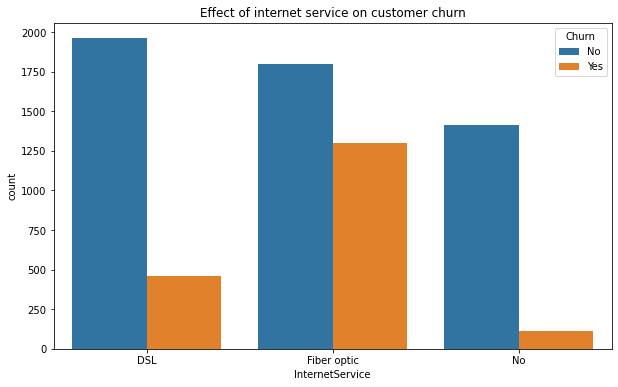

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'InternetService', hue='Churn', data=df)
ax.set_title(f'Effect of internet service on customer churn')

As we can see from above graph that customers who are using DSL internet service tends to be more loyal as compare to fiber optic using customers. There can be many reasons for this and an accurate conclusion can be drawn by analyzing DSL and fiber optic data in detail. So my suggestion to the company is to find the shortcoming in the DSL service and keep doing what they're doing with fiber optic service. Also note that if customers are not using nay internet service then churn count reduces even further. So over all the company should have a look at the internet service offerings and try to fix bring down the shortcomings. 

Now let's have a look at the effect of tenure on customer churn.

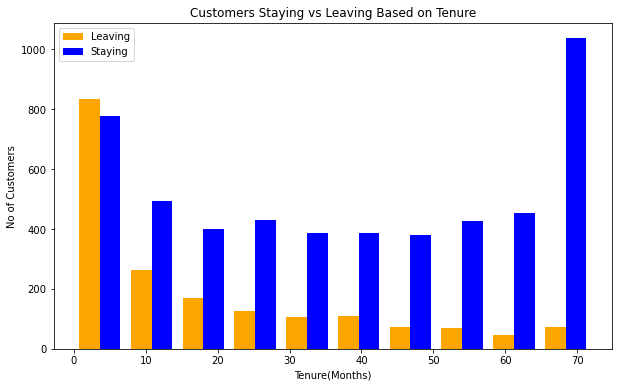

In [ ]:
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
tenure_churn_no = df[df.Churn == 'No'].tenure

plt.figure(figsize=(10,6))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Tenure(Months)')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Tenure')
plt.legend()

From above histogram it's clear that more number of customers tend to stay with the company after the first 10 months of service. So the company can concentrate more on the new customer and their initial experience with the service to increase the customer retention.

Let also visualize the customer churn with respect to monthly charges.

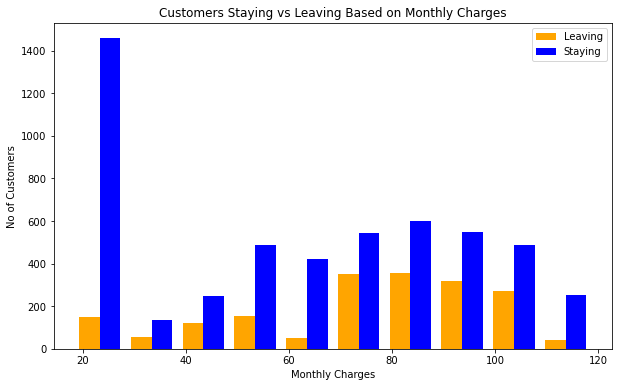

In [ ]:
monthly_charges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
monthly_charges_churn_no = df[df.Churn == 'No'].MonthlyCharges


plt.figure(figsize=(10,6))
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Monthly Charges')
plt.legend()

As you see from above histogram for lowest monthly rates(between 20 and 40) highest is the customer retention. But customer attrition increases for monthly charges between 70 and 100. So the company can reduce the monthly charges or add more value to the service for the same price to increase the customer retention.

## Data Cleaning & Preprocessing <a id ="9"></a>
Data visualization gave us idea about the features which are affecting the customer churn. Now let's clean and precess the data to make it ready for modeling.

### Feature Selection <a id ="10"></a>
It's not necessary that all the given features are going to help predict customer churn. In our case customer id is one of that feature which will not add any value to our analysis or the model's accuracy. So let's remove the customer id columns from the dataset. Note that whenever I make major change in dataset I create new pandas dataframe and increase the number by 1.

In [ ]:
df1 = df.drop('customerID', axis = 'columns')
df1.shape # Print the shape of new dataframe

(7043, 20)

Now our dataset contains 7043 training examples and 20 features. Now let's review the data types of the features.

### Feature Encoding <a id ="11"></a>
* One of the important task is to make sure that each feature has datatype as per the data it represents. In this case 'MonthlyCharge' feature has float64 datatype but 'TotalCharges' has 'object' data type. 
* We will first print the datatype of all the columns and depending on the value it contains we will use either label or one hot encoding to convert the features to numeric format

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Let check the values present in 'TotalCharges' column and change the data type to numeric. 

In [ ]:
# Print the values in TotalCharges
df1.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

As you can see total charges value is in string format. But there is one more interesting thing about these values. For 11 customers total charges value is blank!! To know more about it lets print those values.

In [ ]:
# Print rows with missing TotalCharges values
df1[df1.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Note that for all above customers tenure is 0 months, that means they are new customers!! Total charges will be available for them after first month of service. Now instead of deleting these training examples we can add 0 as total charges!

In [ ]:
df1.TotalCharges =  df1.TotalCharges.replace(r' ', '0')
df1[df1.tenure == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


Now we have updated the missing value lets change the datatype of the total charges column to numeric.

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
print(f'New datatype of TotalCharges : { df1.TotalCharges.dtype}')    

New datatype of TotalCharges : float64


### Transform Categorical Values <a id ="12"></a>
* As you must have notice most of the columns have values 'Yes', 'No' , 'No phone service, 'No internet service' etc
* We will print all the unique values for categorical columns and then replace the duplicate categories like 'No phone service' and 'No internet service' with simple 'No' category.
* Once we get yes and no categories then, we will convert them  into numeric format (Yes: 1, No: 0)
* This is called as Hot Encoding. For more details about it please refer [One Hot Encoding](https://satishgunjal.com/one_hot_encoding/)

In [ ]:
def print_unique_col_values(df):
    """Print unique values from categorical columns of the given dataframe"""
    print('Unique values from categorical columns,\n')
    for column in df.columns:
        if(df[column].dtypes == 'object'): 
            print(f'column: {column}, Unique vlaues: {df[column].unique()}')
        
print_unique_col_values(df1)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No phone service' 'No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes' 'No internet service']
column: OnlineBackup, Unique vlaues: ['Yes' 'No' 'No internet service']
column: DeviceProtection, Unique vlaues: ['No' 'Yes' 'No internet service']
column: TechSupport, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingTV, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingMovies, Unique vlaues: ['No' 'Yes' 'No internet service']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mail

Now lets replace 'No phone service' with 'No' in column MultipleLines and  ''No internet service' with 'no' in columns OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. We can run this replaces, directly on the dataframe.

In [ ]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)
# Lets print unique values again
print_unique_col_values(df1)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes']
column: OnlineBackup, Unique vlaues: ['Yes' 'No']
column: DeviceProtection, Unique vlaues: ['No' 'Yes']
column: TechSupport, Unique vlaues: ['No' 'Yes']
column: StreamingTV, Unique vlaues: ['No' 'Yes']
column: StreamingMovies, Unique vlaues: ['No' 'Yes']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column: Churn, Unique vlaues: ['No' 'Yes']


All our categorical values don't have any numeric order or relationship between them, means these 'Nominal  Categorical Values'. We should use One Hot Encoding instead of label encoding to convert them into numeric format. Since Churn contains our class labels we can manually assign numeric values to it.

In [ ]:
# Converting churn to numeric
df1['Churn'].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
# Create df2 for cleaned dataset
df2 = pd.get_dummies(data = df1)

print(f'So we have added {df2.shape[1]- df1.shape[1]} more columns to our list. New shape : {df2.shape}')
df2.sample(5)

So we have added 19 more columns to our list. New shape : (7043, 39)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
121,0,6,20.70,112.75,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
5849,0,63,19.95,1234.80,0,0,1,0,1,1,...,0,0,0,1,0,1,1,0,0,0
1924,1,22,85.35,1961.60,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2393,0,33,103.70,3467.00,1,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
2157,0,51,106.80,5498.80,0,0,1,0,1,1,...,1,0,1,0,0,1,1,0,0,0


### Scaling & Normalization <a id ="13"></a>
In this step we are going identify the features who need to be scaled and scale them using sklearn's MinMaxScaler. Scaling is used to standardize the range of input features so that our machine learning model can quickly learn from the data.
In our case features tenure, MonthlyCharges and TotalCharges need to be scaled.

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale]) # Fit to data, then transform it
df2[cols_to_scale].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


As you can see now all our feature values are in the range of 0 to 1. Now let's prepare the training and testing data set for modeling.

# Train Test Split <a id ="14"></a>
We are going to create train and test datasets for training and testing respectively. Training dataset will have 80% of the data and test set will have 20% of the data. For more details please refer [link](https://satishgunjal.com/train_test_split/)

In [ ]:
# Create feature matrix X without label column 'Churn'
X = df2.drop('Churn',axis = 'columns')
# Create label vector y
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

# Lets have a look at our training datatset
X_train.sample(5)

X_train: (5634, 38), y_train: (5634,)
X_test: (1409, 38), y_test: (1409,)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1792,0,0.583333,0.508955,0.352144,0,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
5334,0,0.680556,0.892537,0.609479,1,0,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0
3245,0,0.319444,0.652239,0.218802,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1982,0,0.194444,0.016915,0.030905,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4365,0,0.875000,0.612438,0.579639,0,1,0,1,1,0,...,1,0,0,1,1,0,0,1,0,0


# Modeling <a id ="15"></a>

## Model Building <a id ="16"></a>

Building the neural network model requires configuring the input, hidden and output layers. Since we have 38 input features we will create first layer with 38 neurons and 'relu' activation function. Then we will add the second dense layer with 14 nodes (or neurons) and ‘relu’ activation function. Since expected output is binary, in the last layer we add only one neuron with sigmoid activation function.

We will use 'binary_crossentropy' since the expected output is binary(churn or not).

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(38, input_shape= (38,), activation= 'relu'),
    tf.keras.layers.Dense(14, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')     
])

model.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Model Training <a id ="17"></a>
For model training we will run for 100 epochs.

In [ ]:
model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7634
Epoch 2/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.7968
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8000
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.7998
Epoch 5/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8019
Epoch 6/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8023
Epoch 7/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8035
Epoch 8/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.7989
Epoch 9/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8055
Epoch 10/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4113 - accura

## Model Evaluation <a id ="18"></a>
For model evaluation we will use test data.

In [ ]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 866us/step - loss: 0.4752 - accuracy: 0.7892


[0.4751974642276764, 0.7892122268676758]

Now lets verify the model predictions on test data.

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

array([[7.2181785e-01],
       [8.5435718e-02],
       [5.3043233e-05],
       [7.3946369e-01],
       [7.5830430e-02]], dtype=float32)

As you can see from the results that predictions for the test data are in the form of 2D array with values ranging from 0 to 1. So in order to get in the binary format we will use threshold 0.5, anything more than 0.5 will be 1(churn-yes) else 0(churn-no)

In [ ]:
y_pred = []

for val in predictions:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
            
y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Lets create a dataframe of true values and predicted values for comparison.

In [ ]:
df_true_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}) 
df_true_pred[:10]

,y_test,y_pred
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
1263,1,0
3732,0,0
1672,0,0
811,1,0
2526,1,0


Check stats like precision, recall and f1-score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.61      0.56      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409



From the report we can see that,
* Precision(Accuracy of positive predictions), Recall(Fraction of positives that were correctly identified) and F1 score(What percent of positive predictions were correct) for 'class 0' is more than 80% and around 60% for 'class 1'
* The accuracy of the model was about 79% which is better than the 73.46%. Remember that 73.46% customer from given data do not churn.

Now let's print the confusion matrix for better visualization.

Text(69.0, 0.5, 'Truth')

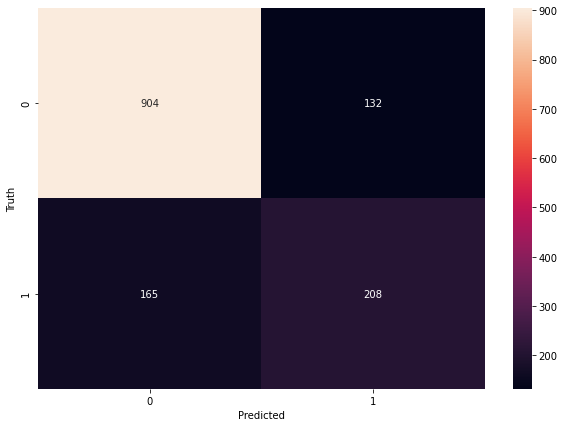

In [ ]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Conclusion <a id ="19"></a>
In EDA I could have gone more in detail for all the features and their effect on the customer churn. But I have only explained few major features which has the highest impact on customer attrition. Predicting customer churn is very tricky as there are so many external factors are also in play like what competition is doing and where does our product or service stand in the market. But all of these is possible to represent with data and hence good model can be built, tricky but possible!

# Reference <a id ="20"></a>
* https://www.youtube.com/watch?v=ocMd2loRfWE
* https://www.youtube.com/watch?v=MSBY28IJ47U&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=18